In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as snus
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('data/train.csv')
df.drop(columns=['Name'], inplace=True)
df.info()
print(df['Working Professional or Student'].value_counts().get("Student", 0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 1891 non-null   object 
 1   Age                                    1891 non-null   int64  
 2   City                                   1891 non-null   object 
 3   Working Professional or Student        1891 non-null   object 
 4   Profession                             1380 non-null   object 
 5   Academic Pressure                      382 non-null    float64
 6   Work Pressure                          1509 non-null   float64
 7   CGPA                                   382 non-null    float64
 8   Study Satisfaction                     382 non-null    float64
 9   Job Satisfaction                       1509 non-null   float64
 10  Sleep Duration                         1891 non-null   object 
 11  Diet

<Axes: xlabel='Work Pressure', ylabel='count'>

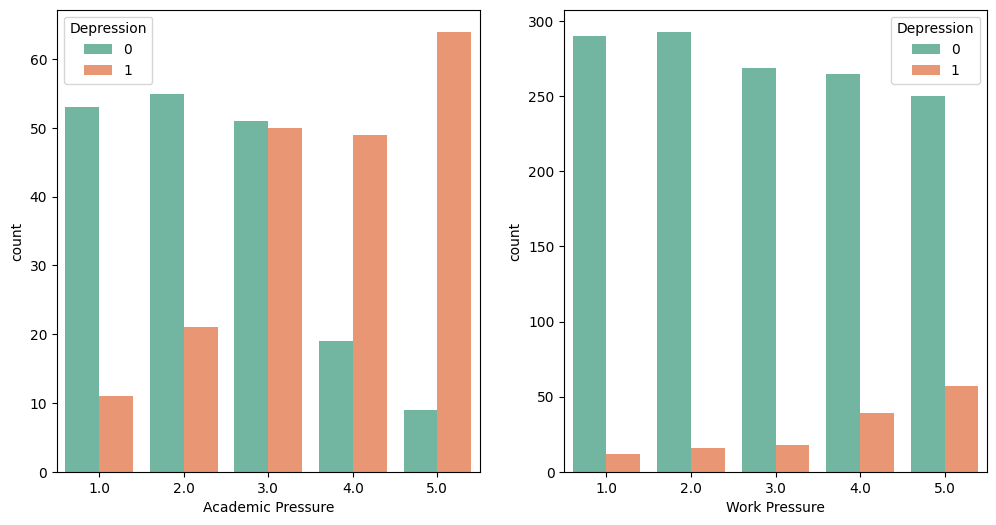

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_student = df[df['Working Professional or Student'] == 'Student']
snus.countplot(x='Academic Pressure', hue='Depression', data=df_student, palette='Set2', ax=axes[0])
df_proffesional = df[df['Working Professional or Student'] == 'Working Professional']
snus.countplot(x='Work Pressure', hue='Depression', data=df_proffesional, palette='Set2', ax=axes[1])

<Axes: xlabel='Job Satisfaction', ylabel='count'>

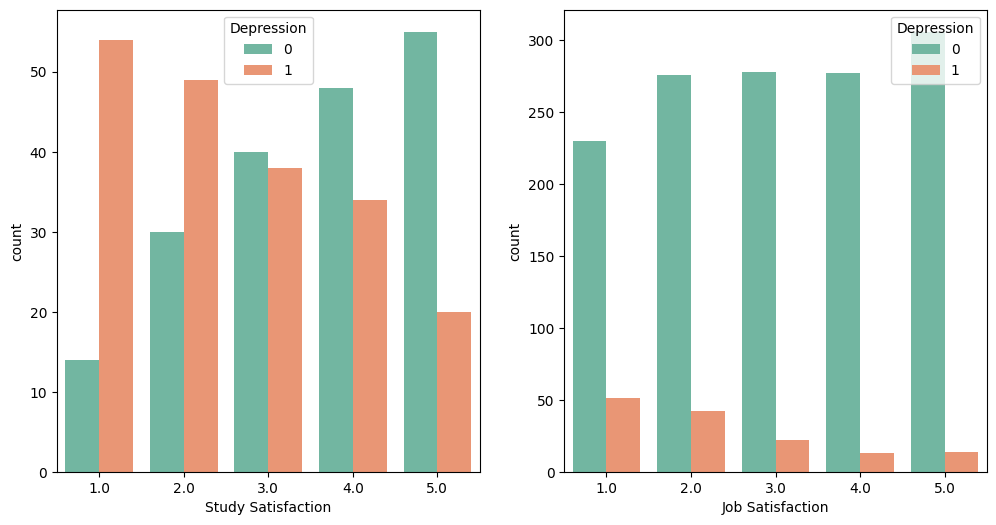

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_student = df[df['Working Professional or Student'] == 'Student']
snus.countplot(x='Study Satisfaction', hue='Depression', data=df_student, palette='Set2', ax=axes[0])
df_proffesional = df[df['Working Professional or Student'] == 'Working Professional']
snus.countplot(x='Job Satisfaction', hue='Depression', data=df_proffesional, palette='Set2', ax=axes[1])

In [168]:
print(f"The percentage of depression among students : {df_student['Depression'].value_counts().get(1, 0) / df_student['Depression'].count() * 100:.2f}%")
print(f"The percentage of depression among professionals : {df_proffesional['Depression'].value_counts().get(1, 0) / df_proffesional['Depression'].count() * 100:.2f}%")

The percentage of depression among students : 51.05%
The percentage of depression among professionals : 9.41%


C:\Users\25583\AppData\Local\Temp\ipykernel_26572\2690934586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snus.boxplot(x='Depression', y='CGPA', data=df_student, palette='Set2')


<Axes: xlabel='Depression', ylabel='CGPA'>

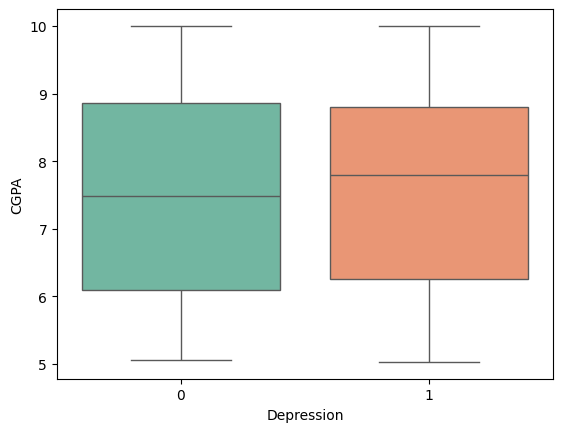

In [169]:
snus.boxplot(x='Depression', y='CGPA', data=df_student, palette='Set2')

In [170]:
X_train = df_student['CGPA']
y_train = df_student['Depression']
log_reg = LogisticRegression()
log_reg.fit(X_train.values.reshape(-1, 1), y_train)
probs = log_reg.predict_proba(X_train.values.reshape(-1, 1))[:, 1]
probs.mean()

np.float64(0.5104729903093764)

In [171]:
df.drop(columns=['CGPA'], inplace=True)

In [172]:
df['Pressure'] = df['Academic Pressure'].fillna(0) + df['Work Pressure'].fillna(0)
df = df.drop(columns=['Academic Pressure', 'Work Pressure'])
df['Satisfaction'] = df['Study Satisfaction'].fillna(0) + df['Job Satisfaction'].fillna(0)
df = df.drop(columns=['Study Satisfaction', 'Job Satisfaction'])
df['Pressure'].isna().sum()

np.int64(0)